# Symmetric Planar Waveguide Examples

**Scott Prahl**

**Jan 2020**


In [1]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt

try:
    import ofiber.planar_step
except:
    print("***** You need to install the ofiber module!")
    print("***** Copy the line below into a new cell, run that cell, then re-start Jupyter.")
    print()
    print("!{sys.executable} -m pip install ofiber")

## Modes for a planar waveguide with V=4.77

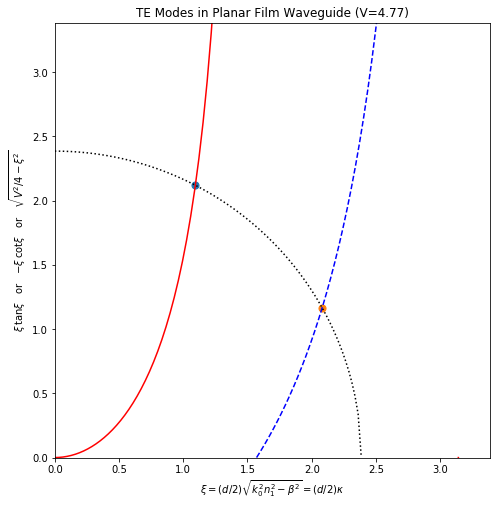

[1.09425217 2.08131807]
b       = [0.78958411 0.23876175]
beta hat= [1.50236925 1.50071683]
theta   = [1.6599766  3.15850983]  degrees


In [2]:
n1=1.503
n2=1.5
Lambda = 0.5e-6
k=2*np.pi/Lambda
NA = np.sqrt(n1**2-n2**2)
d = 4e-6

V = k * d * NA
xx = ofiber.planar_step.TE_crossings(V)

b = 1-(2*xx/V)**2
beta = np.sqrt((n1**2-n2**2)*b+n2**2)
theta = np.arccos(beta/n1)*180/np.pi

aplt = ofiber.planar_step.TE_mode_plot(V)
yy = np.sqrt((V / 2)**2 - xx[0::2]**2)
aplt.scatter(xx[0::2],yy,s=50)
yy = np.sqrt((V / 2)**2 - xx[1::2]**2)
aplt.scatter(xx[1::2],yy,s=50)
aplt.show()

print(xx)
print('b       =',b)
print('beta hat=',beta)
print('theta   =',theta,' degrees')


## Modes for a planar waveguide with V=3.15

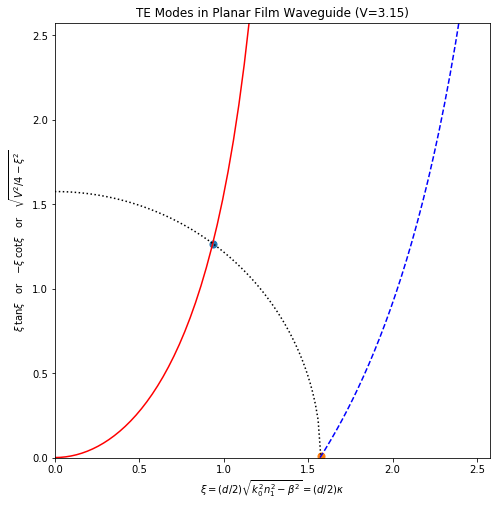

cutoff wavelength = 759 nm


In [3]:
V=3.15
xx = ofiber.planar_step.TE_crossings(V)
aplt = ofiber.planar_step.TE_mode_plot(V)
yy = np.sqrt((V / 2)**2 - xx[0::2]**2)
aplt.scatter(xx[0::2],yy,s=50)
yy = np.sqrt((V / 2)**2 - xx[1::2]**2)
aplt.scatter(xx[1::2],yy,s=50)

aplt.show()

print('cutoff wavelength = %.0f nm'%(2*d*NA*1e9))

## Modes for a planar waveguide with V=5.5

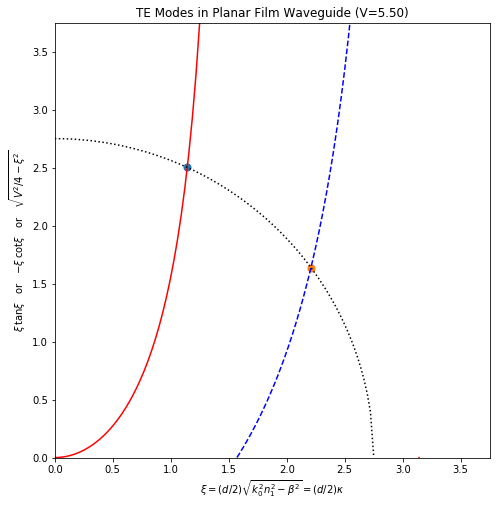

cutoff wavelength = 759 nm


In [4]:
V=5.5
xx = ofiber.planar_step.TE_crossings(V)
aplt = ofiber.planar_step.TE_mode_plot(V)
yy = np.sqrt((V / 2)**2 - xx[0::2]**2)
aplt.scatter(xx[0::2],yy,s=50)
yy = np.sqrt((V / 2)**2 - xx[1::2]**2)
aplt.scatter(xx[1::2],yy,s=50)

aplt.show()

print('cutoff wavelength = %.0f nm'%(2*d*NA*1e9))

## Modes for a planar waveguide with V=16

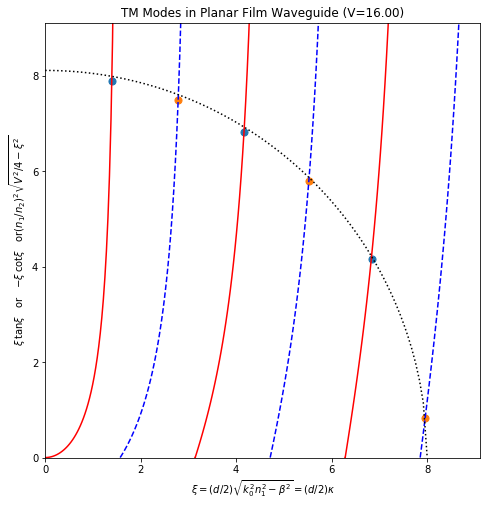

In [5]:
V=16
n1=1.5
n2=1.49
xx = ofiber.planar_step.TM_crossings(V,n1,n2)

aplt = ofiber.planar_step.TM_mode_plot(V,n1,n2)
yy = np.sqrt((V / 2)**2 - xx[0::2]**2)
aplt.scatter(xx[0::2],yy,s=50)
yy = np.sqrt((V / 2)**2 - xx[1::2]**2)
aplt.scatter(xx[1::2],yy,s=50)

aplt.show()

## Fields in a waveguide with V=15

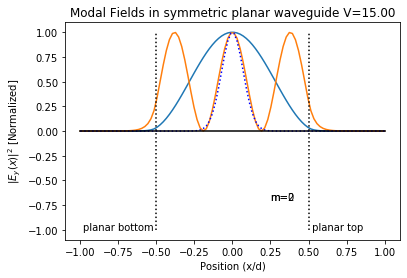

In [6]:
V= 15
d = 1
x = np.linspace(-1,1,100)

#m=1
#plt.plot(x,TE_field(V,d,x,m)**2)
#plt.annotate('m=%d'%m,xy=(0.25,0.7))

m=0
plt.plot(x,ofiber.planar_step.TE_field(V,d,x,m)**2)
plt.annotate('m=%d'%m,xy=(0.25,-0.7))

m=2
plt.plot(x,ofiber.planar_step.TE_field(V,d,x,m)**2)
plt.annotate('m=%d'%m,xy=(0.25,-0.7))

plt.plot(x,np.exp(-x**2/0.01),':b')
plt.plot([-1,1],[0,0],'k')

plt.plot([-0.5,-0.5],[-1,1],':k')
plt.plot([0.5,0.5],[-1,1],':k')
plt.annotate('planar bottom ',xy=(-0.5,-1),ha='right')
plt.annotate(' planar top',xy=(0.5,-1),ha='left')

plt.xlabel('Position (x/d)')
plt.ylabel('$|E_y(x)|^2$ [Normalized]')
plt.title('Modal Fields in symmetric planar waveguide V=%.2f'%V)
plt.show()

## Finally, the classic graph showing different propagation modes

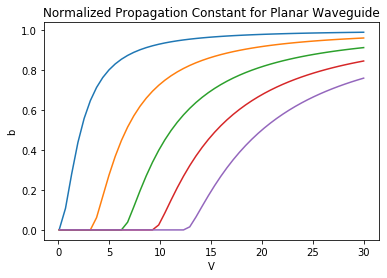

In [7]:
V = np.linspace(0.1,30,50)
for mode in range(5):
    b = ofiber.planar_step.TE_propagation_constant(V,mode)
    plt.plot(V,b)
    
plt.xlabel("V")
plt.ylabel('b')
plt.title('Normalized Propagation Constant for Planar Waveguide')
plt.show()

## And the same graph with both TE and TM modes

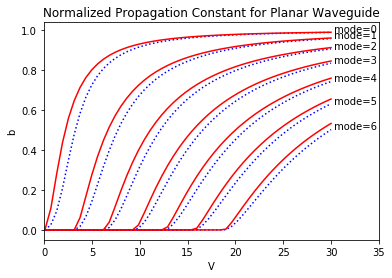

In [8]:
n1=1.5
n2=1.0
V = np.linspace(0.1,30,50)
for mode in range(7):
    b = ofiber.planar_step.TM_propagation_constant(V,n1,n2,mode)
    plt.annotate(' mode=%d'%mode,xy=(30,b[-1]))
    plt.plot(V,b,':b')
    b = ofiber.planar_step.TE_propagation_constant(V,mode)
    plt.plot(V,b,'r')
    
plt.xlabel("V")
plt.ylabel('b')
plt.title('Normalized Propagation Constant for Planar Waveguide')
plt.xlim(0,35)
plt.show()